## CNN LSTM - With conventional data representation approach *lat, lon

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D, LSTM, TimeDistributed, Flatten
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import Sequence

In [2]:
to_store_path = r'D:\2 Thesis\2 models\2023.07.02 all models\CNN LSTM_02\prediction csv\v1_cnn_lstm_pred_output.csv'

In [3]:
X_train = np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\1_10_train\data_2019_train_X_v8_out.npy').astype('float32')
Y_train_lat =np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\1_10_train\data_2019_train_Y_lat_v8_out.npy').astype('float32')
Y_train_lon =np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\1_10_train\data_2019_train_Y_lon_v8_out.npy').astype('float32')

X_val = np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\11_val\data_2019_11_X.npy').astype('float32')
Y_val_lat = np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\11_val\data_2019_11_Y_lat.npy').astype('float32')
Y_val_lon = np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\11_val\data_2019_11_Y_lon.npy').astype('float32')

X_test = np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\12_test\data_2019_12_X.npy').astype('float32')
Y_test_lat = np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\12_test\data_2019_12_Y_lat.npy').astype('float32')
Y_test_lon = np.load(r'D:\2 Thesis\1 train datasets\1 train geocoordinate\12_test\data_2019_12_Y_lon.npy').astype('float32')

In [4]:
## Checkpoint save - lat
checkpoint_filepath_lat = r'D:\2 Thesis\2 models\2023.07.02 all models\CNN LSTM_02\best model normal ds\cnn lstm_lat_best_model_v1.h5'

## Checkpoint save - lon
checkpoint_filepath_lon = r'D:\2 Thesis\2 models\2023.07.02 all models\CNN LSTM_02\best model normal ds\cnn lstm_lon_best_model_v1.h5'

In [5]:
class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y


In [6]:
train_gen_lat = DataGenerator(X_train, Y_train_lat, 200)
val_gen_lat = DataGenerator(X_val, Y_val_lat, 200)

train_gen_lon = DataGenerator(X_train, Y_train_lon, 200)
val_gen_lon = DataGenerator(X_val, Y_val_lon, 200)

In [10]:
# define the CNN-LSTM model
def cnn_lstm_model(n_steps_input ,n_steps_output,n_features):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(n_steps_input, n_features)))
    model.add(LSTM(units=74, activation='tanh', return_sequences=True))
    model.add(LSTM(units=74, activation='tanh'))
    model.add(Dense(units=n_steps_output))
    return model


In [11]:
model_summary = cnn_lstm_model(10,10,8).summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 32)             800       
                                                                 
 lstm_2 (LSTM)               (None, 8, 74)             31672     
                                                                 
 lstm_3 (LSTM)               (None, 74)                44104     
                                                                 
 dense_1 (Dense)             (None, 10)                750       
                                                                 
Total params: 77,326
Trainable params: 77,326
Non-trainable params: 0
_________________________________________________________________


In [12]:

model_lat = cnn_lstm_model(n_steps_input = 10, n_steps_output = 10  , n_features = 8 )

# compile the model
model_lat.compile(optimizer= Adam(learning_rate = 0.0001), loss = 'mean_squared_error', metrics=['mae'] )
checkpoint_lat = ModelCheckpoint(checkpoint_filepath_lat, monitor='val_loss', save_best_only=True, mode='min')

# trrain the model
history_lat = model_lat.fit(train_gen_lat, validation_data = val_gen_lat, epochs=5, verbose=1, callbacks = [checkpoint_lat])


Epoch 1/5
54621/54621 [==============================] - 667s 12ms/step - loss: 6.5795e-04 - mae: 0.0086 - val_loss: 1.1410e-05 - val_mae: 0.0024
Epoch 2/5
54621/54621 [==============================] - 670s 12ms/step - loss: 2.4972e-05 - mae: 0.0034 - val_loss: 2.6214e-05 - val_mae: 0.0045
Epoch 3/5
54621/54621 [==============================] - 542s 10ms/step - loss: 1.7658e-05 - mae: 0.0028 - val_loss: 5.2336e-06 - val_mae: 0.0016
Epoch 4/5
54621/54621 [==============================] - 515s 9ms/step - loss: 1.3654e-05 - mae: 0.0024 - val_loss: 4.9839e-06 - val_mae: 0.0016
Epoch 5/5
54621/54621 [==============================] - 559s 10ms/step - loss: 1.0877e-05 - mae: 0.0022 - val_loss: 1.5905e-05 - val_mae: 0.0030


In [18]:
# trrain the model
history_lat = model_lat.fit(train_gen_lat, validation_data = val_gen_lat, epochs=15, verbose=1, callbacks = [checkpoint_lat])

Epoch 1/15
54621/54621 [==============================] - 700s 13ms/step - loss: 9.2584e-06 - mae: 0.0020 - val_loss: 5.2073e-06 - val_mae: 0.0016
Epoch 2/15
54621/54621 [==============================] - 706s 13ms/step - loss: 8.1159e-06 - mae: 0.0019 - val_loss: 2.1036e-05 - val_mae: 0.0034
Epoch 3/15
54621/54621 [==============================] - 726s 13ms/step - loss: 7.7435e-06 - mae: 0.0018 - val_loss: 5.7484e-06 - val_mae: 0.0018
Epoch 4/15
54621/54621 [==============================] - 736s 13ms/step - loss: 6.9939e-06 - mae: 0.0017 - val_loss: 3.0658e-06 - val_mae: 0.0012
Epoch 5/15
54621/54621 [==============================] - 711s 13ms/step - loss: 6.4154e-06 - mae: 0.0016 - val_loss: 5.7398e-06 - val_mae: 0.0018
Epoch 6/15
54621/54621 [==============================] - 693s 13ms/step - loss: 6.2110e-06 - mae: 0.0016 - val_loss: 2.9648e-06 - val_mae: 0.0010
Epoch 7/15
54621/54621 [==============================] - 712s 13ms/step - loss: 5.7656e-06 - mae: 0.0015 - val_loss: 

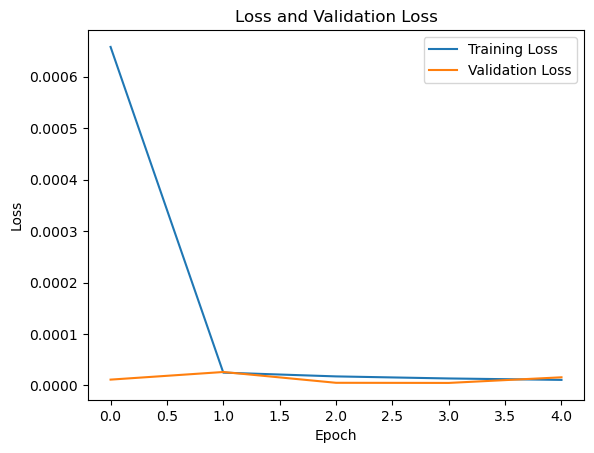

In [13]:

# Plot the training and validation loss (MSE)
plt.plot(history_lat.history["loss"], label="Training Loss")
plt.plot(history_lat.history["val_loss"], label="Validation Loss")
plt.title("Loss and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

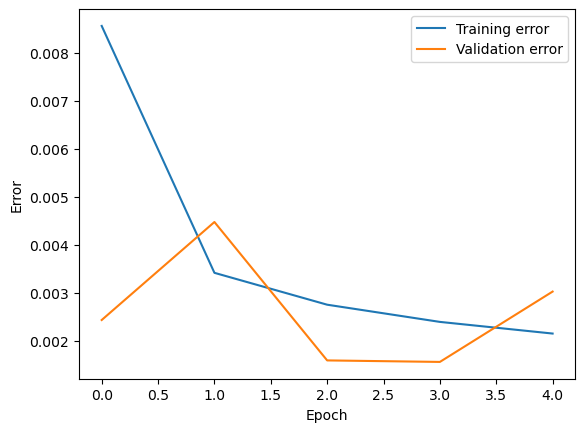

In [14]:
# Plot the training and validation error (MAE)
plt.plot(history_lat.history['mae'], label='Training error')
plt.plot(history_lat.history['val_mae'], label='Validation error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

In [23]:
from tensorflow.keras.models import load_model

best_model_lat = load_model(checkpoint_filepath_lat)

In [25]:
# Evaluate the model
Y_test_pred_lat = best_model_lat.predict(X_test)

28322/28322 [==============================] - 128s 4ms/step


In [26]:
# # Equalize shapes 
Y_test_lat = Y_test_lat.squeeze()

In [27]:
mse_lat = mean_squared_error(Y_test_lat, Y_test_pred_lat)
print("Mean Squared Error_test_pred_lat:", mse_lat)

Mean Squared Error_test_pred_lat: 1.9608674e-06


In [22]:
model_lon = cnn_lstm_model(n_steps_input = 10, n_steps_output = 10  , n_features = 8 )

# Compile the model
model_lon.compile(optimizer= Adam(learning_rate = 0.0001), loss = 'mean_squared_error', metrics=['mae'] )
checkpoint_lon = ModelCheckpoint(checkpoint_filepath_lon, monitor='val_loss', save_best_only=True, mode='min')

# Train the model
history_lon = model_lon.fit(train_gen_lon, validation_data = val_gen_lon, epochs=20, verbose=1, callbacks = [checkpoint_lon])   

Epoch 1/20
54621/54621 [==============================] - 675s 12ms/step - loss: 5.8006e-04 - mae: 0.0076 - val_loss: 2.2483e-05 - val_mae: 0.0035
Epoch 2/20
54621/54621 [==============================] - 638s 12ms/step - loss: 1.7747e-05 - mae: 0.0030 - val_loss: 8.0642e-06 - val_mae: 0.0020
Epoch 3/20
54621/54621 [==============================] - 641s 12ms/step - loss: 1.2599e-05 - mae: 0.0025 - val_loss: 9.1590e-06 - val_mae: 0.0021
Epoch 4/20
54621/54621 [==============================] - 666s 12ms/step - loss: 9.9606e-06 - mae: 0.0022 - val_loss: 8.0901e-06 - val_mae: 0.0022
Epoch 5/20
54621/54621 [==============================] - 663s 12ms/step - loss: 8.5395e-06 - mae: 0.0020 - val_loss: 7.2214e-06 - val_mae: 0.0020
Epoch 6/20
54621/54621 [==============================] - 675s 12ms/step - loss: 7.3362e-06 - mae: 0.0018 - val_loss: 3.9424e-06 - val_mae: 0.0013
Epoch 7/20
54621/54621 [==============================] - 690s 13ms/step - loss: 6.8441e-06 - mae: 0.0018 - val_loss: 

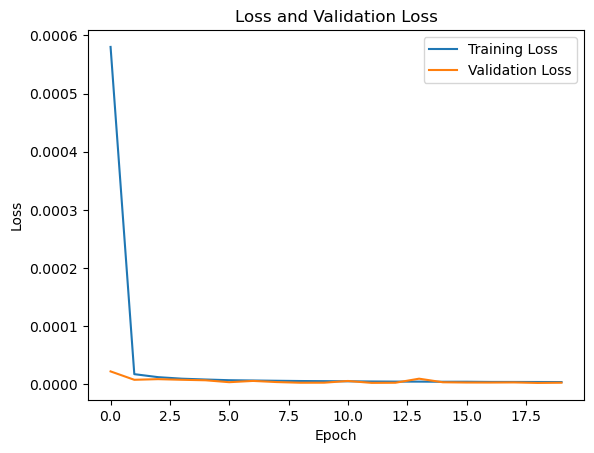

In [28]:
# Plot the training and validation loss : for Longitude model
plt.plot(history_lon.history["loss"], label="Training Loss")
plt.plot(history_lon.history["val_loss"], label="Validation Loss")
plt.title("Loss and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

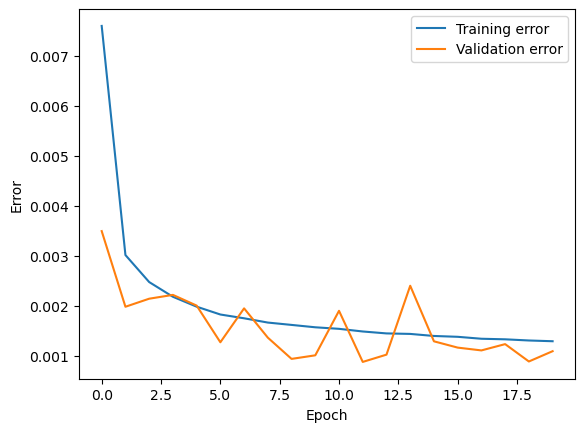

In [29]:
# Plot the training and validation error : for Longitude model
plt.plot(history_lon.history['mae'], label='Training error')
plt.plot(history_lon.history['val_mae'], label='Validation error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

In [30]:
## Loading best longitude model
best_model_lon = load_model(checkpoint_filepath_lon)

In [31]:
# Evaluate the model
Y_test_pred_lon = best_model_lon.predict(X_test)

28322/28322 [==============================] - 124s 4ms/step


In [32]:
# Equalize shapes
Y_test_lon = Y_test_lon.squeeze()

In [33]:
mse_lon = mean_squared_error(Y_test_lon, Y_test_pred_lon)
print("Mean Squared Error Y_test_pred_lon:", mse_lon)


Mean Squared Error Y_test_pred_lon: 2.692032e-06


In [34]:
Y_pred_lat_flat = Y_test_pred_lat.flatten()
Y_pred_lat_df = pd.DataFrame(Y_pred_lat_flat, columns=['lat_s_pred'])

Y_pred_lon_flat = Y_test_pred_lon.flatten()
Y_pred_lon_df = pd.DataFrame(Y_pred_lon_flat, columns=['lon_s_pred'])

# Concatnating the lat lon predictions - to on df
Y_pred_df = pd.concat([Y_pred_lat_df, Y_pred_lon_df], axis=1)

In [35]:
Y_test_lat_flat = Y_test_lat.flatten()
Y_test_lat_df = pd.DataFrame(Y_test_lat_flat, columns=['lat_s_test'])

Y_test_lon_flat = Y_test_lon.flatten()
Y_test_lon_df = pd.DataFrame(Y_test_lon_flat, columns=['lon_s_test'])

# Concatnating the lat lon test data - to on df
Y_test_df = pd.concat([Y_test_lat_df, Y_test_lon_df], axis=1)

In [36]:
# converting back to lat long degrees

min_lat, max_lat = 58.6, 59.93
min_lon, max_lon = 9.4, 11.45

Y_pred_df['lat_pred'] = Y_pred_df['lat_s_pred'] * (max_lat - min_lat) + min_lat
Y_pred_df['lon_pred'] = Y_pred_df['lon_s_pred'] * (max_lon - min_lon) + min_lon

Y_test_df['lat_test'] = Y_test_df['lat_s_test'] * (max_lat - min_lat) + min_lat
Y_test_df['lon_test'] = Y_test_df['lon_s_test'] * (max_lon - min_lon) + min_lon


In [37]:
Y_test_and_pred_df = pd.concat([Y_pred_df, Y_test_df], axis=1)

In [39]:
from haversine import haversine, Unit

Y_test_and_pred_df['deviation_dist_m'] = Y_test_and_pred_df.apply(lambda row: haversine(
    (row['lat_pred'], 
    row['lon_pred']),
    (row['lat_test'], 
    row['lon_test']),
    unit=Unit.METERS
    ),axis=1)

In [41]:
mean_deviation = Y_test_and_pred_df['deviation_dist_m'].mean()
median_deviation = Y_test_and_pred_df['deviation_dist_m'].median()

print('CNN_LSTM_model_mean_displacement_error:', mean_deviation)
print('CNN_LSTM_model_median_displacement_error:', median_deviation)

CNN_LSTM_model_mean_displacement_error: 168.24927231805003
CNN_LSTM_model_median_displacement_error: 109.3562601496393


In [42]:
step_means = []
for step in range(10):
    step_mean = Y_test_and_pred_df['deviation_dist_m'][step::9].mean()
    step_means.append(step_mean)


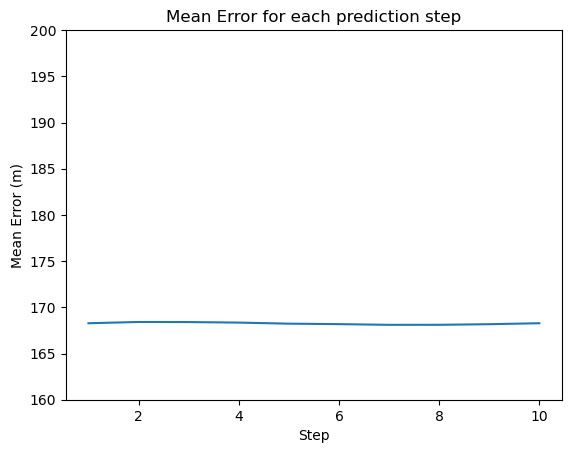

In [43]:
import matplotlib.pyplot as plt

step_means = []
for step in range(10):
    step_mean = Y_test_and_pred_df['deviation_dist_m'][step::9].mean()
    step_means.append(step_mean)

plt.plot(range(1, 11), step_means)
plt.xlabel('Step')
plt.ylabel('Mean Error (m)')
plt.title('Mean Error for each prediction step')
plt.ylim(00, 200)
plt.show()


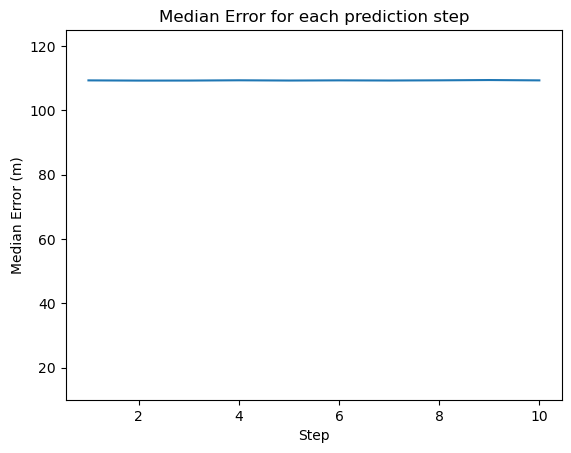

In [48]:
import matplotlib.pyplot as plt

step_medians = []
for step in range(10):
    step_median = Y_test_and_pred_df['deviation_dist_m'][step::9].median()
    step_medians.append(step_median)

plt.plot(range(1, 11), step_medians)
plt.xlabel('Step')
plt.ylabel('Median Error (m)')
plt.title('Median Error for each prediction step')
plt.ylim(00,125)
plt.show()


In [45]:

step_FDE = Y_test_and_pred_df['deviation_dist_m'][9::9].mean()
print('Final displacement error (meters) is:', step_FDE)

Final displacement error (meters) is: 168.27742640765354


In [46]:
Y_test_and_pred_df['voyage_id'] = Y_test_and_pred_df.index // 10
Y_test_and_pred_df['step'] = np.arange(len(Y_test_and_pred_df)) % 10


In [47]:
Y_test_and_pred_df.to_csv(to_store_path)